In [4]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets as dat
from sklearn import tree
from sklearn import metrics as met
from sklearn import model_selection as mod
from sklearn import linear_model as lin
from sklearn import preprocessing as pre
from sklearn import pipeline as pip # sklearn pipeline
from sklearn import svm
from sklearn import impute as imp
from sklearn.experimental import enable_iterative_imputer
from sklearn import compose as com
from sklearn import ensemble as ens

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Data read from file

train_data = pd.read_excel("/content/train.xlsx")
train_data.head()

,ID,ncap rating,is power door locks,policyholder age,is parking camera,rear brakes type,is adjustable steering,is tpms,is driver seat height adjustable,segment,...,is parking sensors,power,gross weight,is day night rear view mirror,model,gear box,airbags,turning radius,area danger level,is claim
0,0,2.0,Yes,0.394496,No,Drum,No,No,No,B1,...,Yes,55.92bhp@5300rpm,1340.0,No,Model_8,5.0,2.0,4.7,4,0
1,1,2.0,Yes,0.417364,No,Drum,No,No,No,B1,...,Yes,55.92bhp@5300rpm,1340.0,No,Model_8,5.0,2.0,4.7,1,1
2,2,2.0,Yes,0.438922,No,Drum,Yes,No,Yes,B2,...,Yes,88.50bhp@6000rpm,1335.0,Yes,Model_6,5.0,2.0,4.8,5,0
3,3,0.0,No,0.656276,No,Drum,No,No,No,A,...,Yes,40.36bhp@6000rpm,1185.0,No,Model_1,5.0,2.0,4.6,2,0
4,4,3.0,Yes,0.462328,Yes,Disc,Yes,Yes,Yes,C2,...,Yes,113.45bhp@4000rpm,1720.0,No,Model_4,6.0,6.0,5.2,3,0


In [5]:
#Identify the unique values

pd.set_option('display.max_rows', None)
dict = {}

for i in list(train_data.columns):
  dict[i] = train_data[i].value_counts().shape[0]

uniq = pd.DataFrame(dict, index = ["Unique counts"]).transpose()
uniq.sort_values(by="Unique counts")

,Unique counts
is rear window washer,2
gear box,2
is day night rear view mirror,2
is parking sensors,2
is speed alert,2
is rear window defogger,2
is esc,2
is power steering,2
is brake assist,2
is front fog lights,2


In [6]:
train_data.columns

Index(['ID', 'ncap rating', 'is power door locks', 'policyholder age',
       'is parking camera', 'rear brakes type', 'is adjustable steering',
       'is tpms', 'is driver seat height adjustable', 'segment', 'car age',
       'is central locking', 'is rear window wiper', 'height', 'cluster area',
       'is ecw', 'fuel type', 'torque', 'engine volume', 'transmission type',
       'manufacturer', 'cylinder', 'is rear window washer',
       'is front fog lights', 'is brake assist', 'is power steering', 'is esc',
       'population', 'is rear window defogger', 'time period', 'engine type',
       'is speed alert', 'steering type', 'length', 'width',
       'is parking sensors', 'power', 'gross weight',
       'is day night rear view mirror', 'model', 'gear box', 'airbags',
       'turning radius', 'area danger level', 'is claim'],
      dtype='object')

In [7]:
train_data.isnull().sum()

ID                                    0
ncap rating                          99
is power door locks                  94
policyholder age                     81
is parking camera                    83
rear brakes type                     86
is adjustable steering               90
is tpms                              89
is driver seat height adjustable     85
segment                              83
car age                             105
is central locking                   89
is rear window wiper                 69
height                               96
cluster area                         85
is ecw                               85
fuel type                            89
torque                               76
engine volume                       103
transmission type                    97
manufacturer                         87
cylinder                             97
is rear window washer                89
is front fog lights                  86
is brake assist                     105


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43592 entries, 0 to 43591
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                43592 non-null  int64  
 1   ncap rating                       43493 non-null  float64
 2   is power door locks               43498 non-null  object 
 3   policyholder age                  43511 non-null  float64
 4   is parking camera                 43509 non-null  object 
 5   rear brakes type                  43506 non-null  object 
 6   is adjustable steering            43502 non-null  object 
 7   is tpms                           43503 non-null  object 
 8   is driver seat height adjustable  43507 non-null  object 
 9   segment                           43509 non-null  object 
 10  car age                           43487 non-null  float64
 11  is central locking                43503 non-null  object 
 12  is r

In [9]:
def conversion_boolean(train_data):
  train_data["is power door locks"] = train_data["is power door locks"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is parking camera"] = train_data["is parking camera"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is adjustable steering"] = train_data["is adjustable steering"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is tpms"] = train_data["is tpms"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is driver seat height adjustable"] = train_data["is driver seat height adjustable"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is parking sensors"] = train_data["is parking sensors"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is day night rear view mirror"] = train_data["is day night rear view mirror"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is rear window washer"] = train_data["is rear window washer"].replace({"YES":True,"No":False}).astype(bool)
  train_data["gear box"] = train_data["gear box"].replace({5:True,6:False}).astype(bool)
  train_data["is speed alert"] = train_data["is speed alert"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is rear window defogger"] = train_data["is rear window defogger"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is esc"] = train_data["is esc"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is power steering"] = train_data["is power steering"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is brake assist"] = train_data["is brake assist"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is front fog lights"] = train_data["is front fog lights"].replace({"YES":True,"No":False}).astype(bool)
  train_data["cylinder"] = train_data["cylinder"].replace({3.0:True,4.0:False}).astype(bool)
  train_data["transmission type"] = train_data["transmission type"].replace({"Manual":True,"Automatic":False}).astype(bool)
  train_data["is ecw"] = train_data["is ecw"].replace({"YES":True,"No":False}).astype(bool)
  train_data["rear brakes type"] = train_data["rear brakes type"].replace({"Drum":True,"Disc":False}).astype(bool)
  train_data["is rear window wiper"] = train_data["is rear window wiper"].replace({"YES":True,"No":False}).astype(bool)
  train_data["is central locking"] = train_data["is central locking"].replace({"YES":True,"No":False}).astype(bool)
  train_data["airbags"] = train_data["airbags"].replace({2.0:True,6.0:False}).astype(bool)

In [10]:
conversion_boolean(train_data)

In [11]:
train_data.head()

,ID,ncap rating,is power door locks,policyholder age,is parking camera,rear brakes type,is adjustable steering,is tpms,is driver seat height adjustable,segment,...,is parking sensors,power,gross weight,is day night rear view mirror,model,gear box,airbags,turning radius,area danger level,is claim
0,0,2.0,True,0.394496,False,True,False,False,False,B1,...,True,55.92bhp@5300rpm,1340.0,False,Model_8,True,True,4.7,4,0
1,1,2.0,True,0.417364,False,True,False,False,False,B1,...,True,55.92bhp@5300rpm,1340.0,False,Model_8,True,True,4.7,1,1
2,2,2.0,True,0.438922,False,True,True,False,True,B2,...,True,88.50bhp@6000rpm,1335.0,True,Model_6,True,True,4.8,5,0
3,3,0.0,False,0.656276,False,True,False,False,False,A,...,True,40.36bhp@6000rpm,1185.0,False,Model_1,True,True,4.6,2,0
4,4,3.0,True,0.462328,True,False,True,True,True,C2,...,True,113.45bhp@4000rpm,1720.0,False,Model_4,False,False,5.2,3,0


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43592 entries, 0 to 43591
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                43592 non-null  int64  
 1   ncap rating                       43493 non-null  float64
 2   is power door locks               43592 non-null  bool   
 3   policyholder age                  43511 non-null  float64
 4   is parking camera                 43592 non-null  bool   
 5   rear brakes type                  43592 non-null  bool   
 6   is adjustable steering            43592 non-null  bool   
 7   is tpms                           43592 non-null  bool   
 8   is driver seat height adjustable  43592 non-null  bool   
 9   segment                           43509 non-null  object 
 10  car age                           43487 non-null  float64
 11  is central locking                43592 non-null  bool   
 12  is r

In [13]:
train_data["torque"][:5]

0    82.1Nm@3400rpm
1    82.1Nm@3400rpm
2     113Nm@4400rpm
3      60Nm@3500rpm
4     250Nm@2750rpm
Name: torque, dtype: object

In [14]:
def torquepower_preprocessor(df):

    df["torque_Nm"] = df["torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["torque_rpm"] = df["torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
    
    df["power_bhp"] = df["power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["power_rpm"] = df["power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    #df.drop(["torque","power"],axis=1,inplace=True)

torquepower_preprocessor(train_data)

train_data[:5]

,ID,ncap rating,is power door locks,policyholder age,is parking camera,rear brakes type,is adjustable steering,is tpms,is driver seat height adjustable,segment,...,model,gear box,airbags,turning radius,area danger level,is claim,torque_Nm,torque_rpm,power_bhp,power_rpm
0,0,2.0,True,0.394496,False,True,False,False,False,B1,...,Model_8,True,True,4.7,4,0,82.1,3400.0,55.92,5300.0
1,1,2.0,True,0.417364,False,True,False,False,False,B1,...,Model_8,True,True,4.7,1,1,82.1,3400.0,55.92,5300.0
2,2,2.0,True,0.438922,False,True,True,False,True,B2,...,Model_6,True,True,4.8,5,0,113.0,4400.0,88.50,6000.0
3,3,0.0,False,0.656276,False,True,False,False,False,A,...,Model_1,True,True,4.6,2,0,60.0,3500.0,40.36,6000.0
4,4,3.0,True,0.462328,True,False,True,True,True,C2,...,Model_4,False,False,5.2,3,0,250.0,2750.0,113.45,4000.0


In [15]:
for i in range(len(train_data.columns)):
  train_data[train_data.columns[i]].fillna(0, inplace=True)

In [16]:
#Split data to train and test

X_train, X_test, y_train, y_test = mod.train_test_split(
    train_data.drop(["is claim","ID","engine type"], axis=1), train_data["is claim"], test_size=0.33, random_state=42)

In [17]:
#categorical colums
cat_columns = list(X_train.select_dtypes(include="object").columns)
cat_columns

['segment',
 'cluster area',
 'fuel type',
 'torque',
 'steering type',
 'power',
 'model']

In [18]:
#numerical colums
num_columns = list(X_train.select_dtypes(include=["float64","int64"]).columns)
num_columns

['ncap rating',
 'policyholder age',
 'car age',
 'height',
 'engine volume',
 'manufacturer',
 'population',
 'time period',
 'length',
 'width',
 'gross weight',
 'turning radius',
 'area danger level',
 'torque_Nm',
 'torque_rpm',
 'power_bhp',
 'power_rpm']

In [19]:
#boolean colums
bool_columns = list(X_train.select_dtypes(include="bool").columns)
bool_columns

['is power door locks',
 'is parking camera',
 'rear brakes type',
 'is adjustable steering',
 'is tpms',
 'is driver seat height adjustable',
 'is central locking',
 'is rear window wiper',
 'is ecw',
 'transmission type',
 'cylinder',
 'is rear window washer',
 'is front fog lights',
 'is brake assist',
 'is power steering',
 'is esc',
 'is rear window defogger',
 'is speed alert',
 'is parking sensors',
 'is day night rear view mirror',
 'gear box',
 'airbags']

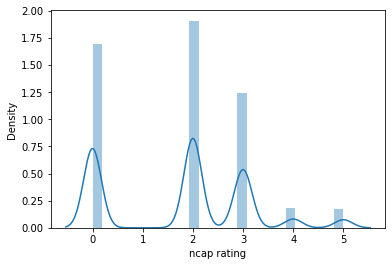

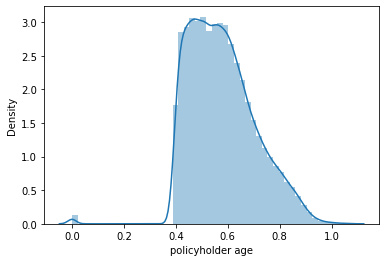

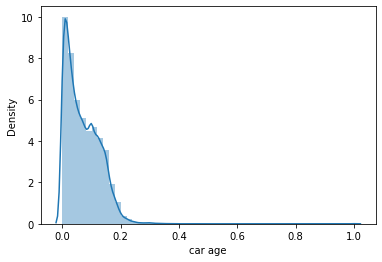

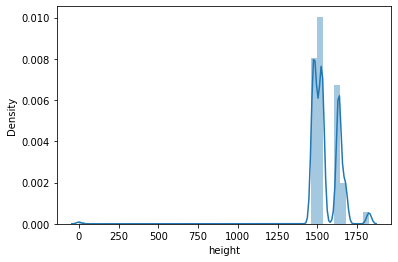

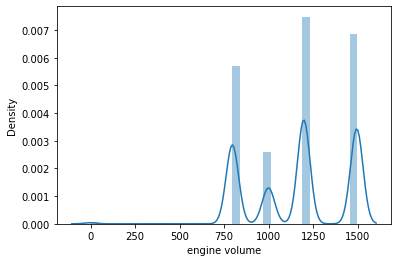

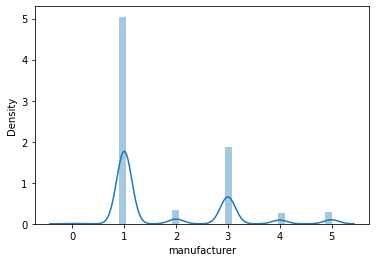

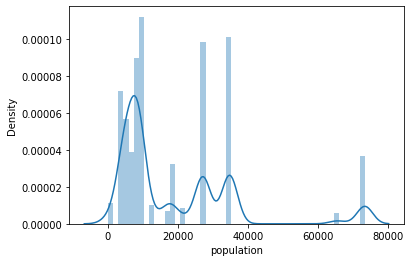

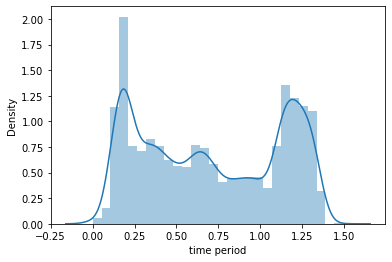

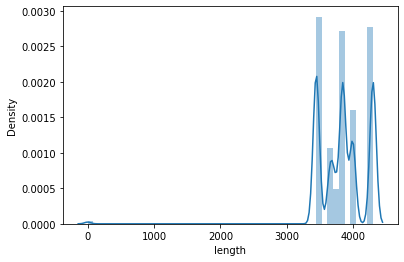

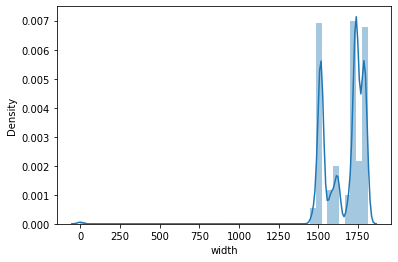

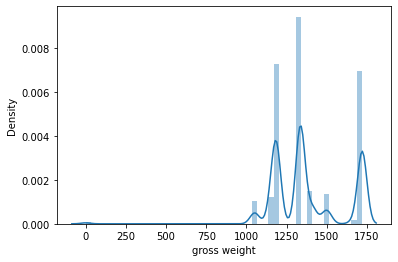

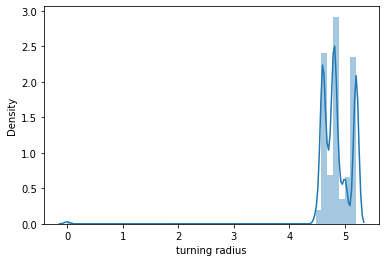

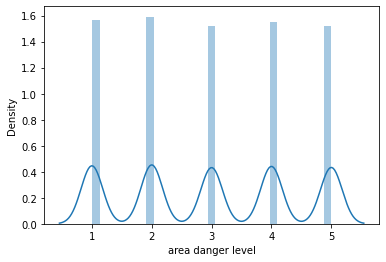

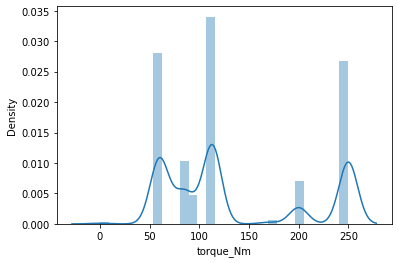

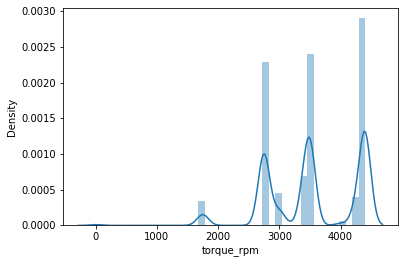

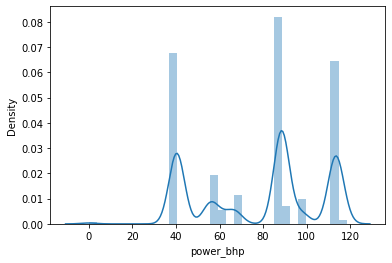

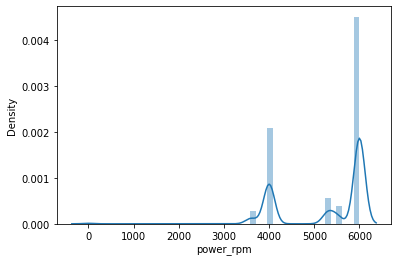

In [20]:
#Numericial colums distribution

for col in num_columns:
  sns.distplot(X_train[col])
  plt.show()

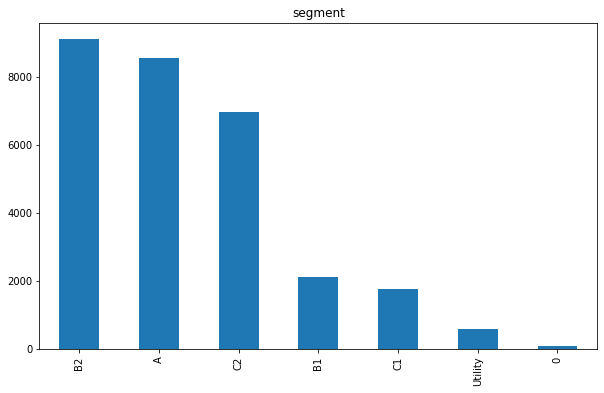

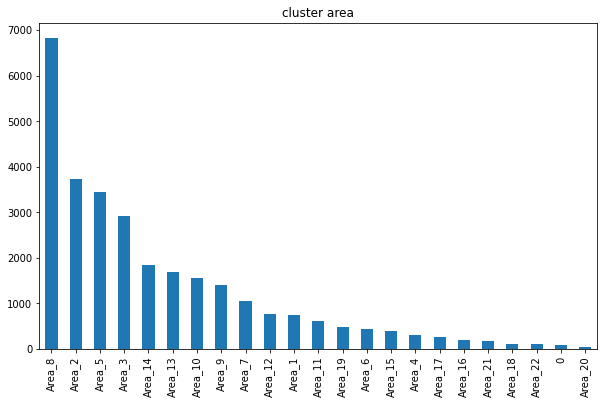

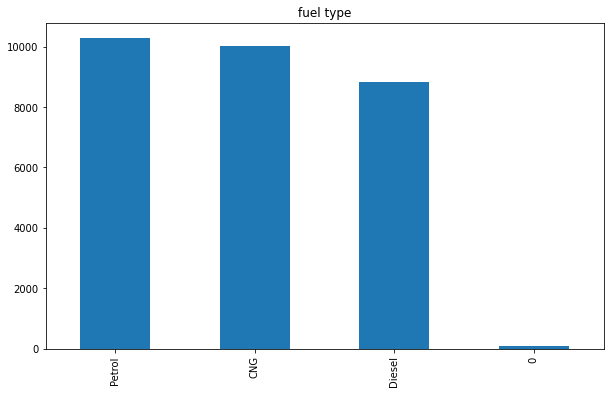

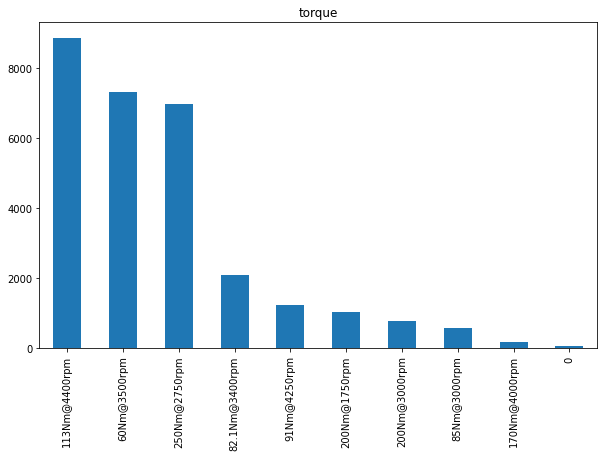

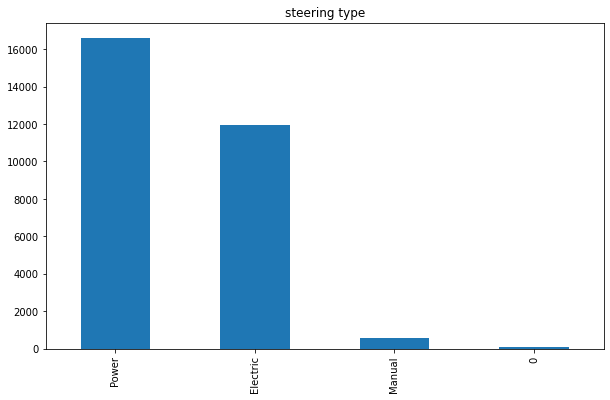

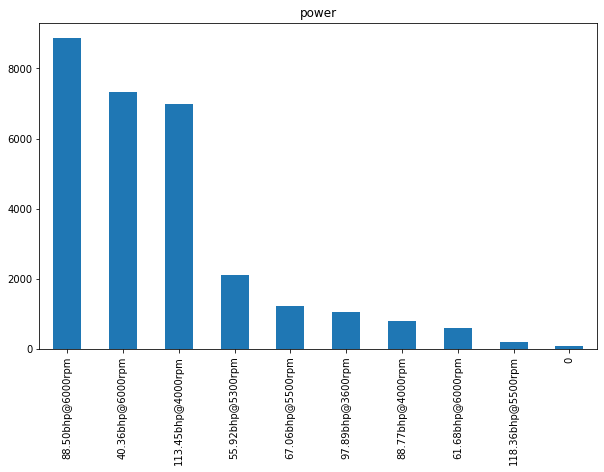

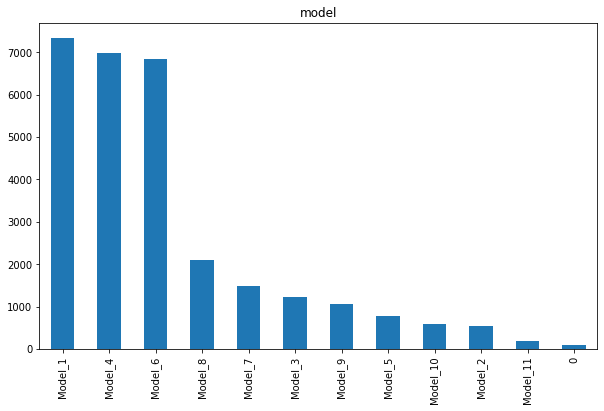

In [21]:
#Categoricial colums distribution

for col in cat_columns:
  if len(X_train[col].unique()) < 200:
    X_train[col].value_counts().plot(kind="bar", figsize=(10, 6))
    plt.title(col)
    plt.show()

In [22]:
# Pipeline with İmputer and Column Transformasyon

#ct_num = com.ColumnTransformer([
#    ("num_skewed", pre.FunctionTransformer(np.log1p), num_columns)
#])

pipe_num = pip.Pipeline([
    ("poly", pre.PolynomialFeatures(degree=10)),
    ("scaler", pre.StandardScaler()),
    ("imp", imp.SimpleImputer(strategy="mean"))
])

pipe_bool = pip.Pipeline([
    ("scaler", pre.StandardScaler()),
    ("imp", imp.SimpleImputer(strategy="most_frequent"))
])

pipe_cat = pip.Pipeline([
    ("imp", imp.SimpleImputer(strategy="most_frequent")),
    ("encoding", pre.OneHotEncoder(handle_unknown="ignore", sparse=True)) 
])

ct = com.ColumnTransformer([
    ("bool", pipe_bool, bool_columns),
    ("num", pipe_num, num_columns),
    ("cat", pipe_cat, cat_columns)
])

#ct.fit_transform(X_train)

In [ ]:
ct.fit_transform(X_train)